In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [18]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [19]:
df = pd.read_csv('stud_math.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [ ]:
## 395 строк и 30 колонок в таблице. Есть пропуски во всех колонках кроме school, age, sex. 

## Далее заменим название некоторых колонок.

In [20]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [21]:
df.columns = ['school', 'sex', 'age', 'address', 'famsize', 'p_status', 'm_edu', 'f_edu',
       'm_job', 'f_job', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']

In [22]:
df.head()

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [ ]:
## Посмотрим на описательные статистики для всех признаков.

In [23]:
df.describe()

,age,m_edu,f_edu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [ ]:
## Пропуски есть везде, кроме колонки age.

## Выбросы есть в колонках 'f_edu', 'failures', 'absenses'

In [ ]:
## Теперь посмотрим на колонки с номинальными данными

In [42]:
df.describe(include=['object'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


In [ ]:
## Пропуски есть везде, кроме колонки school и sex
## большинство ходили в школу, разделение по полу примерно одинаковое, большую часть учеников посещала детский сад 
## и мама играла вещущую роль в воспитании
### в основном все городские жители

In [ ]:
## Пронализируем некоторые отдельные колонки

## Age

In [43]:
df.loc[:,['age']].describe()

,age
count,395.000000
mean,16.696203
std,1.276043
min,15.000000
25%,16.000000
50%,17.000000
75%,18.000000
max,22.000000


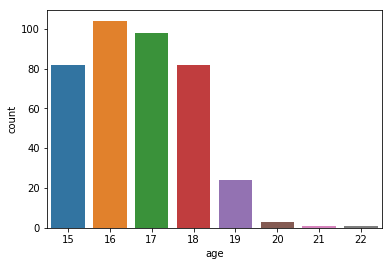

In [44]:
sns.countplot(x='age', data = df)

## School

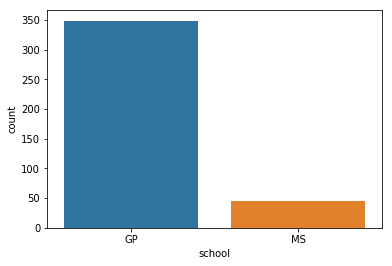

In [67]:
df.school.value_counts()
sns.countplot(x='school', data = df)

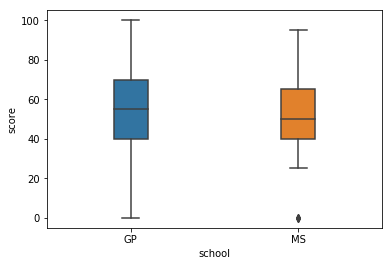

In [65]:
## Дети в основном посещали школу GP. Интересно отличается ли балл в зависимости от этого параметра.
sns.boxplot(x = 'school', y = 'score', data = df, width = 0.2)

## Sex

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
sex    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


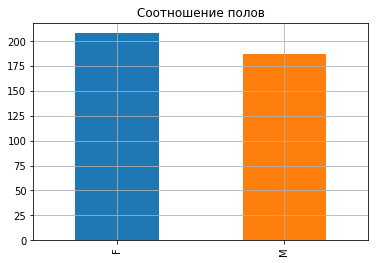

In [45]:
df.sex.value_counts()
df.loc[:,['sex']].info()
df['sex'].value_counts().plot(kind = 'bar', grid = 'True', title = 'Соотношение полов')

## Address

In [46]:
df.address.value_counts()

U    295
R     83
Name: address, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
address    378 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


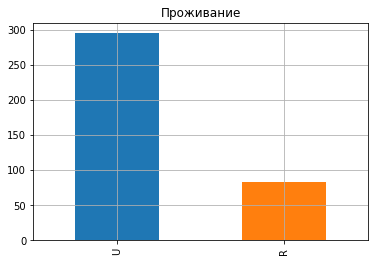

In [91]:
df.loc[:,['address']].info()
df['address'].value_counts().plot(kind = 'bar', grid = 'True', title = 'Проживание')

In [ ]:
## В основном все городские жители с лучшим доступом к обраованию. Посмотрим как влияет этот признако на средний бал.
## Судя по графику ниже, городские жители имеют чуть более высокий бал (смотрим по медиане).

address
R    50.0
U    55.0
Name: score, dtype: float64


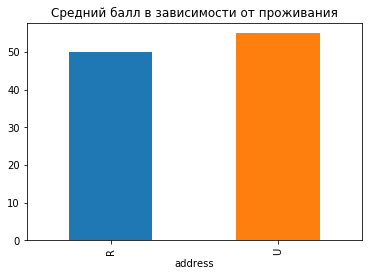

In [92]:
print(df.groupby('address')['score'].median())
df.groupby('address')['score'].median().plot(kind = 'bar', title = 'Средний балл в зависимости от проживания')

## Score

In [48]:
df.loc[:,['score']].info()
df.loc[:,['score']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
score    389 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


,score
count,389.000000
mean,52.262211
std,22.919022
min,0.000000
25%,40.000000
50%,55.000000
75%,70.000000
max,100.000000


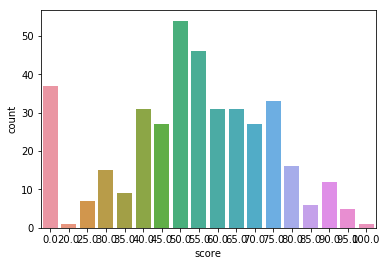

In [95]:
sns.countplot(x='score',data = df)

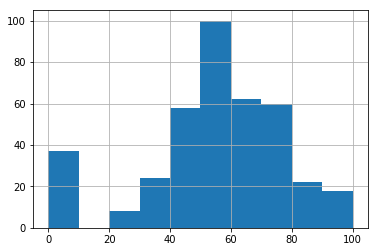

In [49]:
df.score.hist()

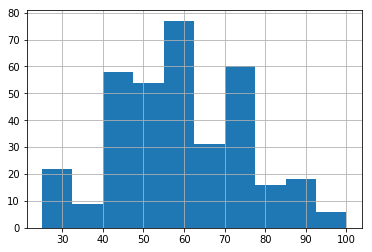

In [50]:
## распределение баллов похоже на нормальное. Можно отбросить выбросы меньше 20 на глаз.
df[df['score']>20].score.hist()

25-й процентиль: 40.0 75-й процентиль: 70.0 IQR: 30.0 Границы выбросов: [-5.0,115.0]


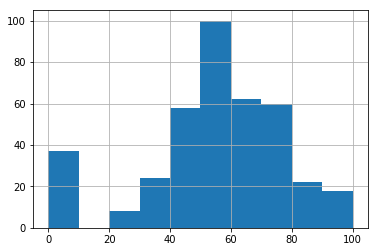

In [53]:
## Можно такж попробовать избавиться от выбросов с помощью формулы интерквартильного растояния
median = df.score.median()
IQR = df.score.quantile(0.75) - df.score.quantile(0.25)
perc25 = df.score.quantile(0.25)
perc75 = df.score.quantile(0.75)
print('25-й процентиль: {}'.format(perc25),'75-й процентиль: {}'.format(perc75), 
      'IQR: {}'.format(IQR), 'Границы выбросов: [{f},{I}]'.format(f=perc25 - 1.5*IQR, I=perc75 + 1.5*IQR))
df.score.loc[df.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(label = 'IQR')     

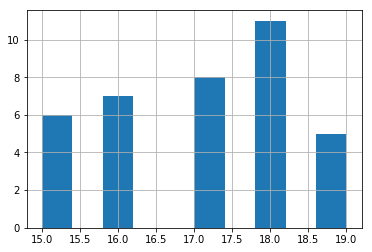

In [71]:
## Видно что при таком подходе границы выходят в отрицательнуюзону и выше 100 баллов, что невозможно.
## Посмотим на учеников, у которых балл меньше 20.
df[df['score']<20].age.hist()

In [14]:
df[df['score']<20].describe()

,age,m_edu,f_edu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
count,37.000000,36.000000,34.000000,32.000000,37.000000,35.000000,37.000000,34.000000,36.000000,36.000000,35.000000,36.0,37.0
mean,17.054054,2.333333,2.323529,1.500000,1.945946,0.857143,-5.837838,3.823529,3.111111,3.166667,3.657143,0.0,0.0
std,1.311190,1.041976,1.147344,0.718421,0.911225,1.033067,2.733674,1.028992,0.887300,1.341641,1.304807,0.0,0.0
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-12.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0
25%,16.000000,1.750000,1.000000,1.000000,1.000000,0.000000,-6.000000,3.000000,3.000000,2.000000,3.000000,0.0,0.0
50%,17.000000,2.000000,2.000000,1.000000,2.000000,1.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,0.0,0.0
75%,18.000000,3.000000,3.000000,2.000000,2.000000,1.000000,-3.000000,4.750000,4.000000,4.000000,5.000000,0.0,0.0
max,19.000000,4.000000,4.000000,3.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,0.0,0.0


In [25]:
## Судя по даным это ученики разных возрастных групп
df[df['score']<20].describe(include = ['object'])

,school,sex,address,famsize,p_status,m_job,f_job,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,37,37,36,34,33,35,33,35,35,37,35,34,35,34,36,32,35
unique,2,2,2,2,2,5,4,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,yes
freq,33,22,26,27,31,12,18,16,23,36,20,27,20,25,30,26,19


In [26]:
## Скорее всего эти ученики просто не сдавали тесты
## Уберем этих учеников из датафрейма
df_new = df[df['score']>20]

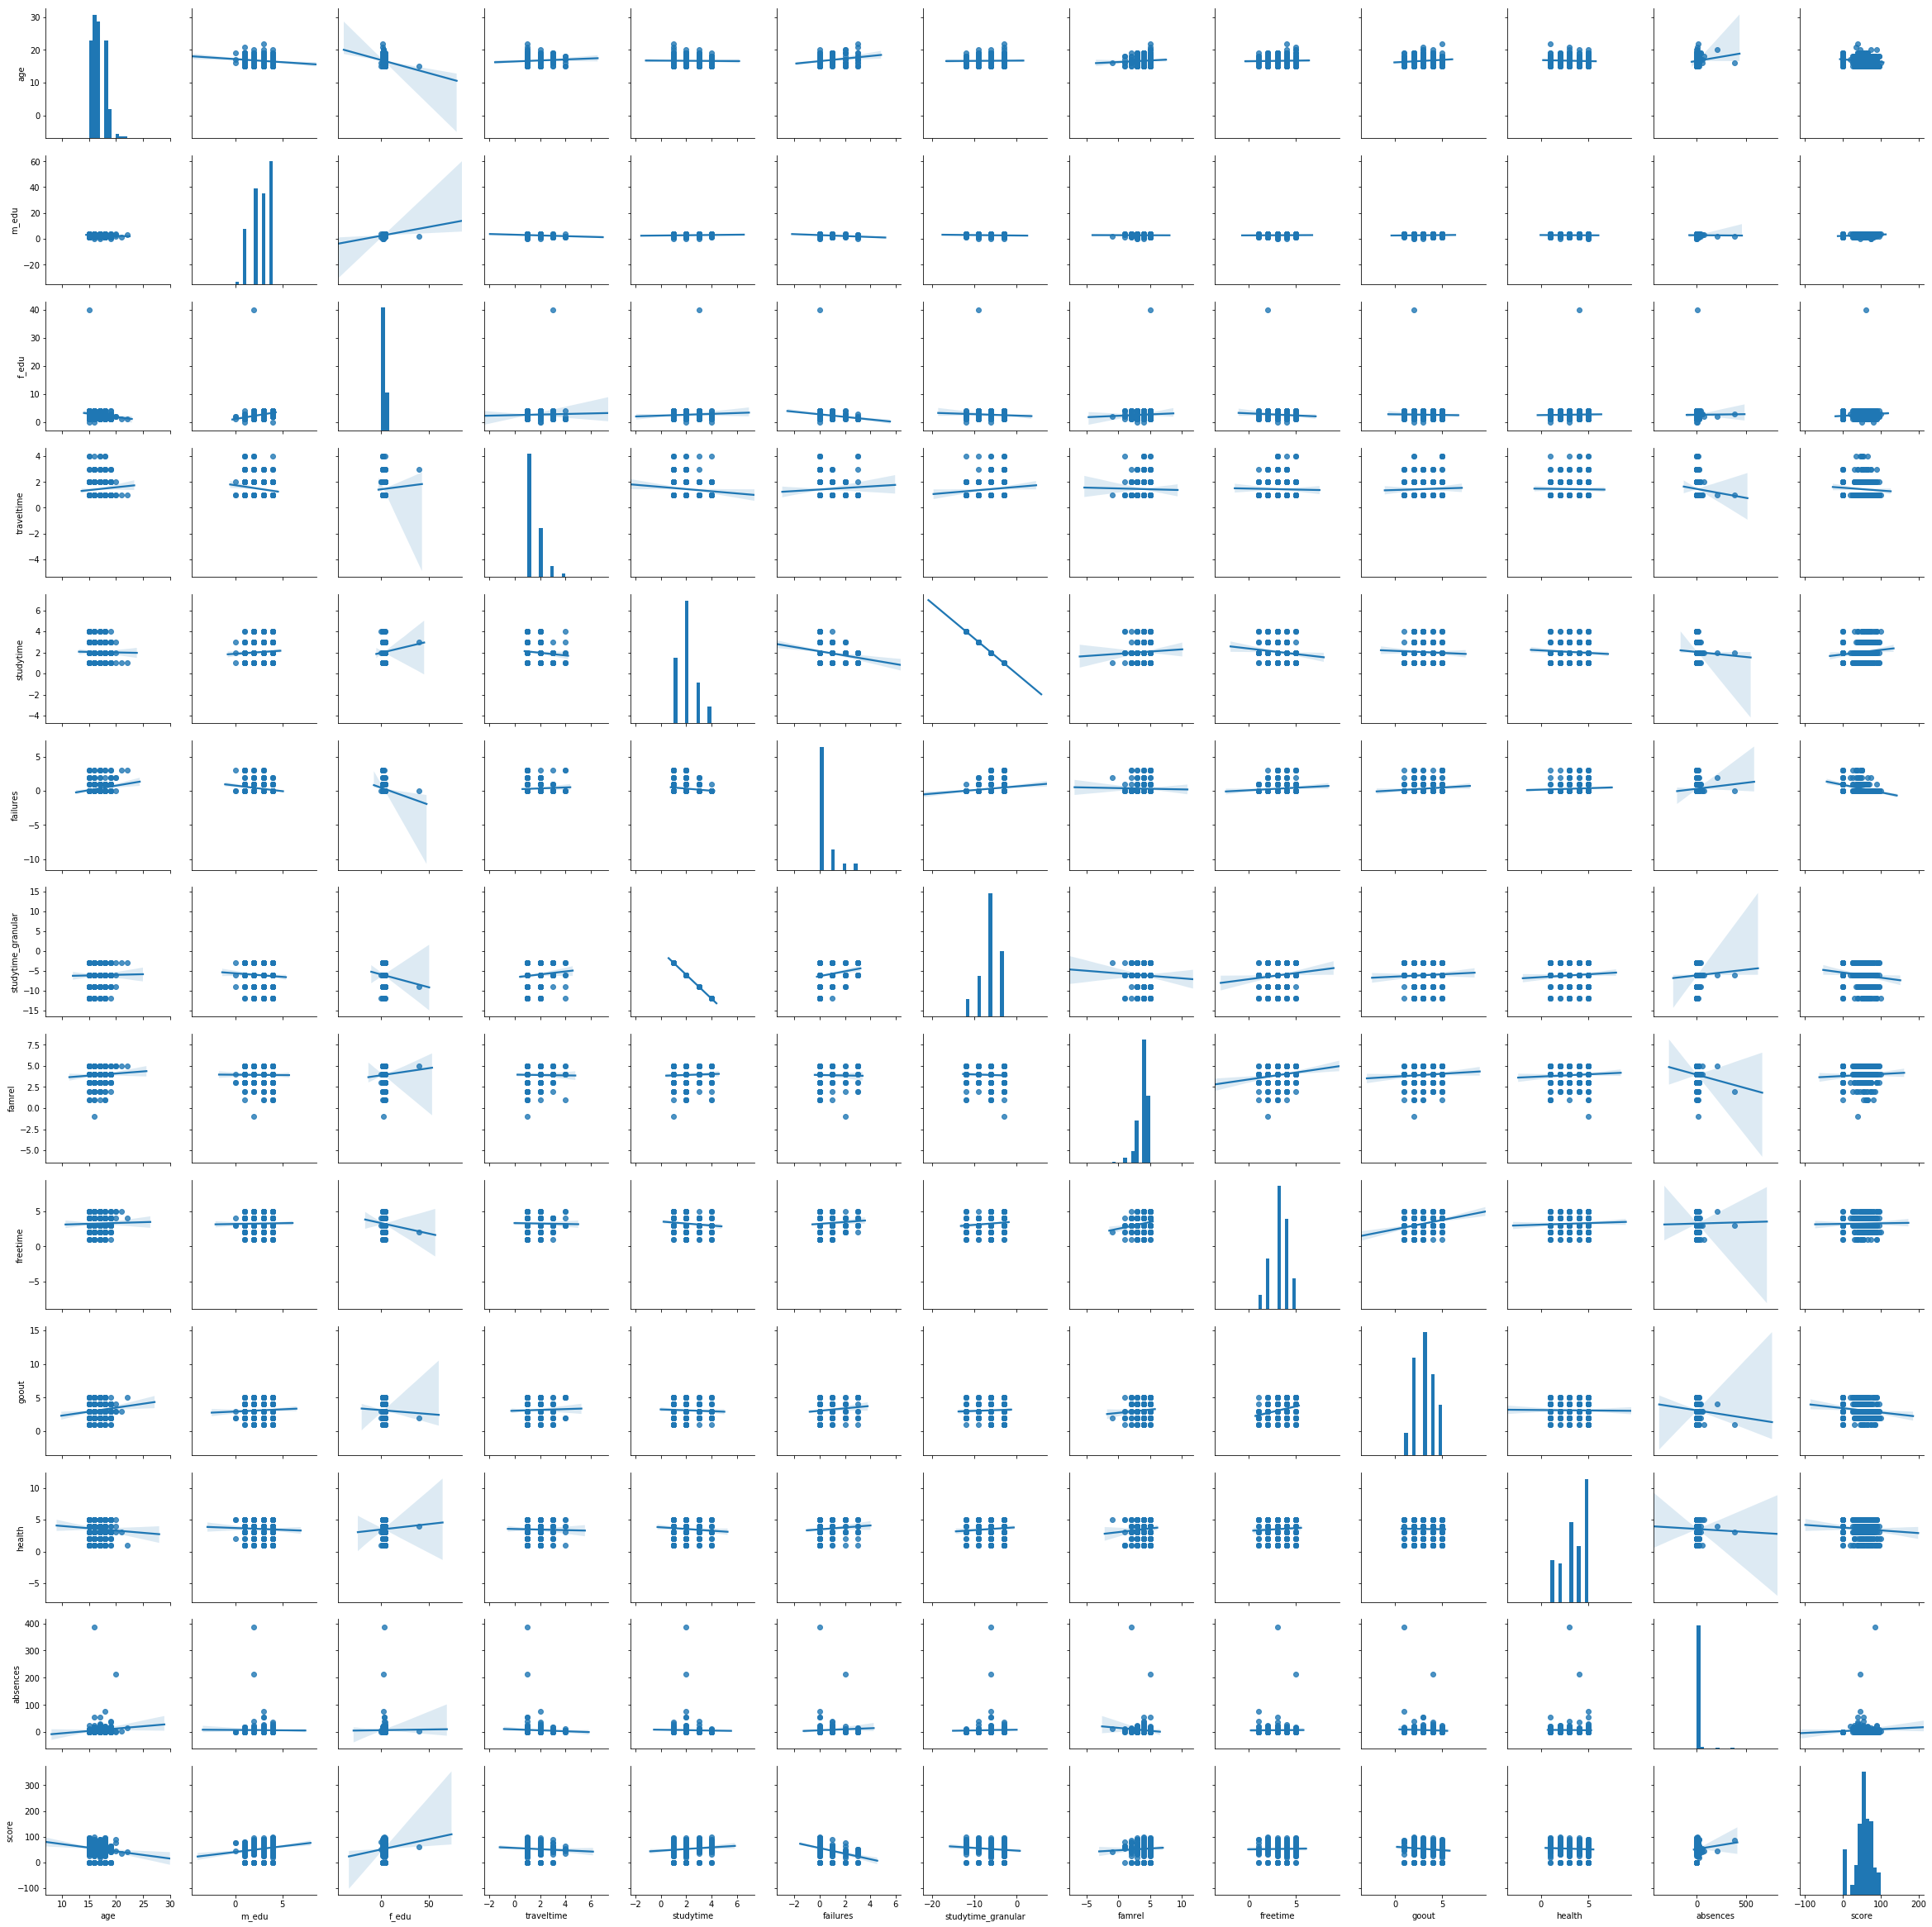

In [16]:
### Посмотрим на корреляцию признаков в датафрейме
sns.pairplot(data = df,kind = 'reg')

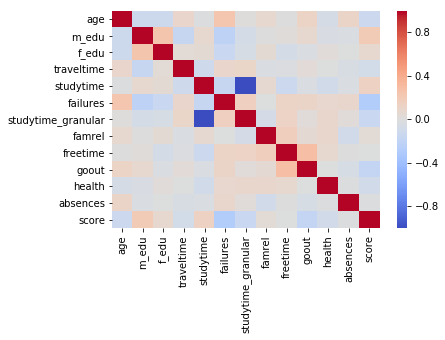

In [99]:
## Посмотрим на весь дата фрейм
correlation = df_new.corr()
sns.heatmap(correlation, annot = False, cmap = 'coolwarm')

In [ ]:
### Видим положительную корреляцию между образованием родителей, параметром studytime и оценками,  
### а также обратную корреляцию между оценками и неудачами ('failures', что логично).

### Номинативные переменные

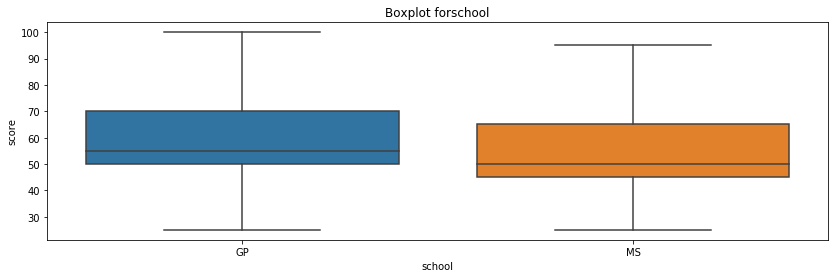

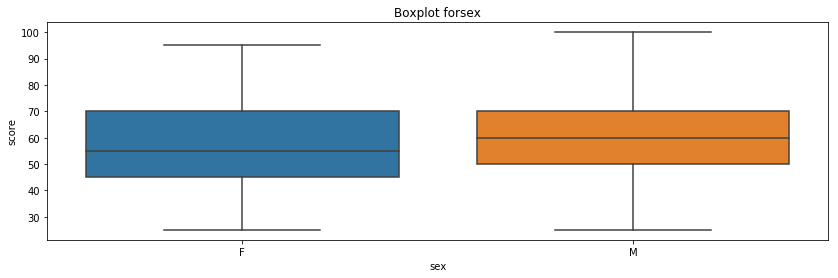

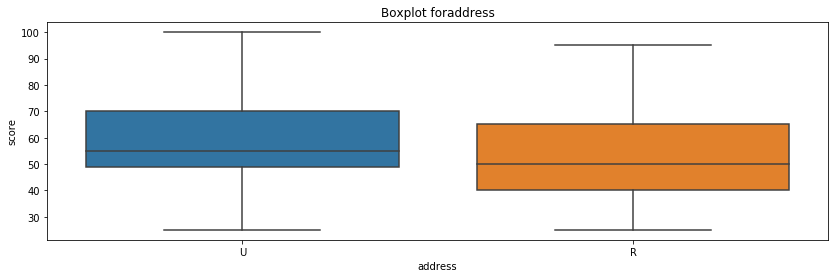

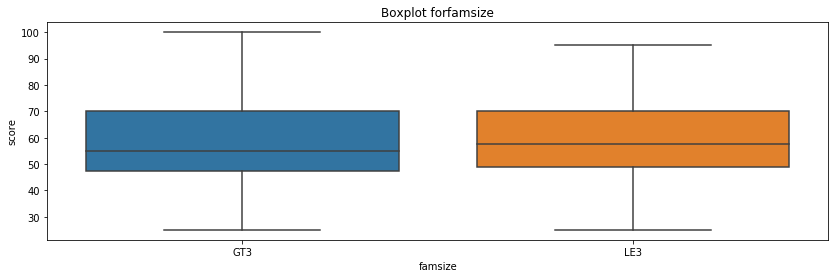

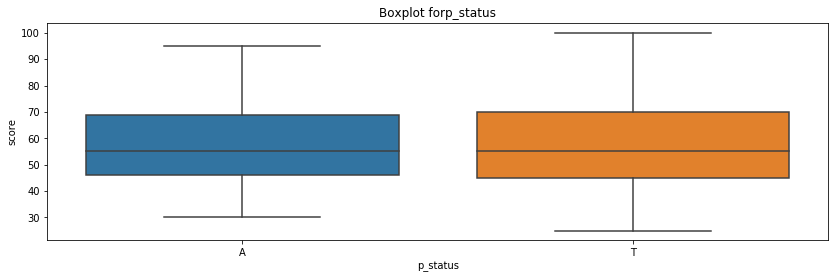

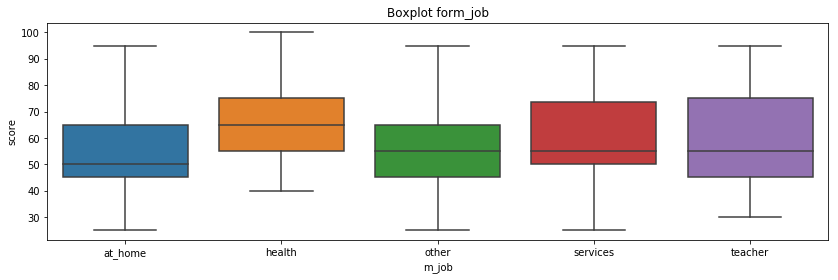

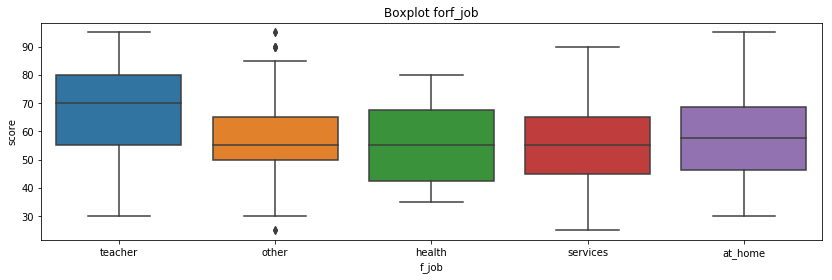

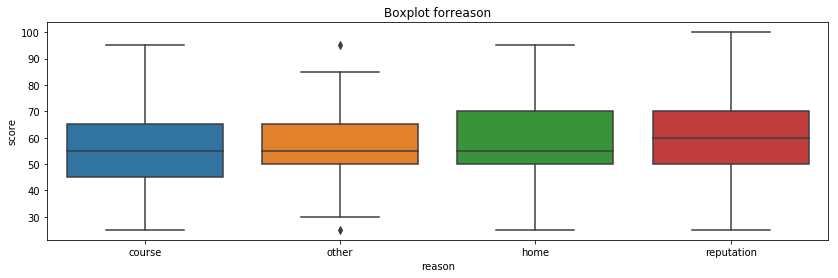

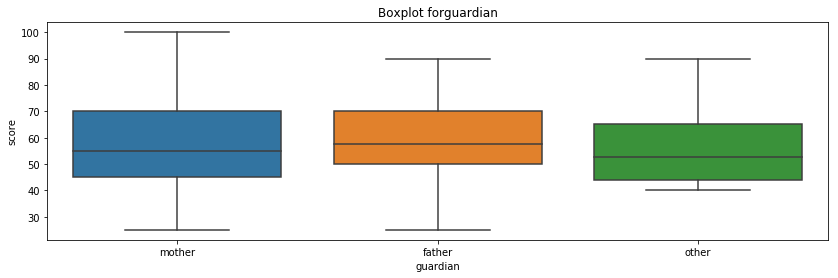

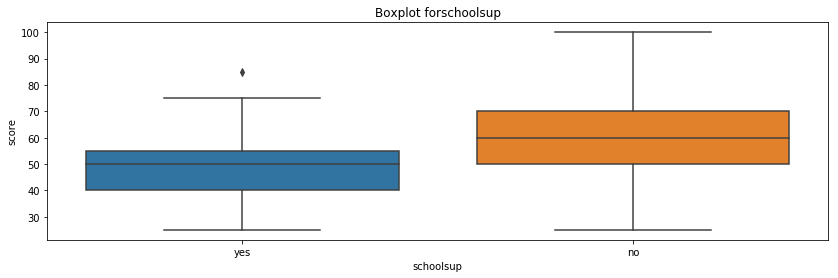

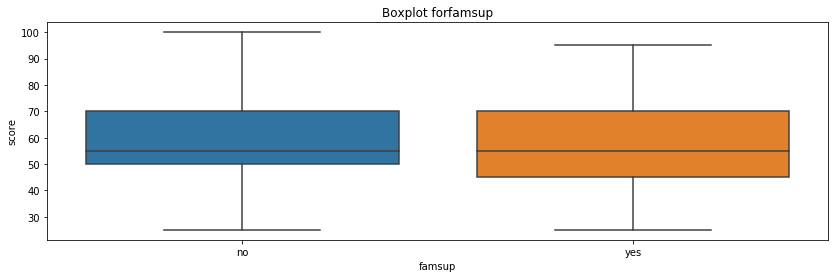

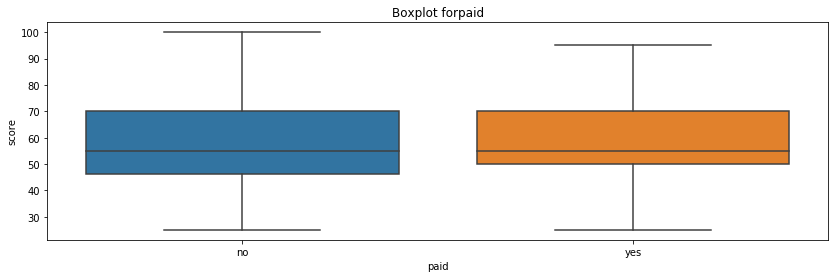

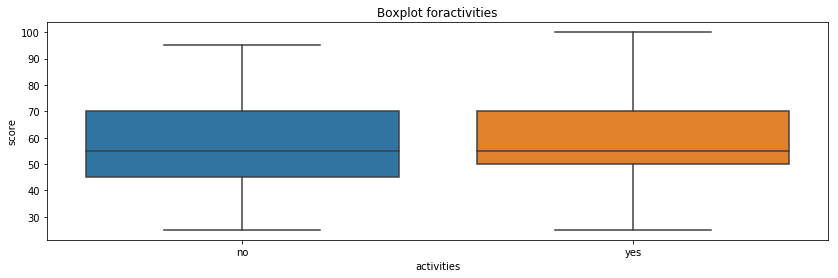

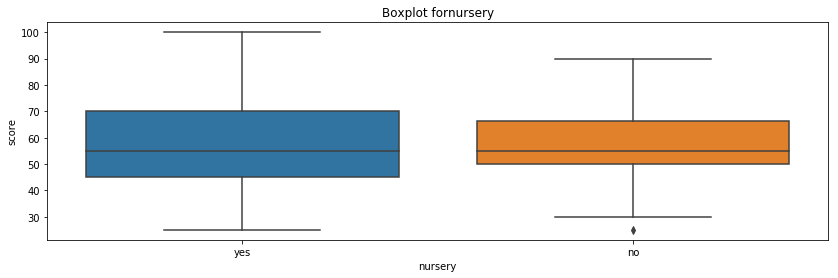

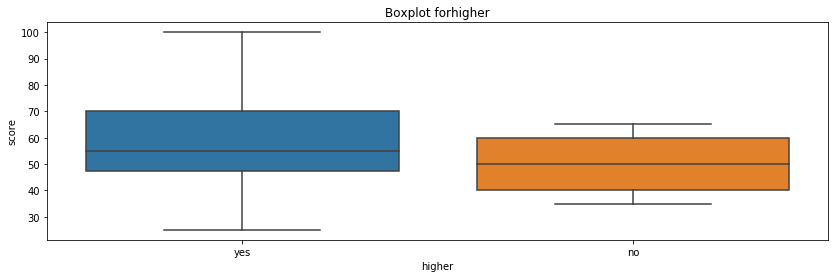

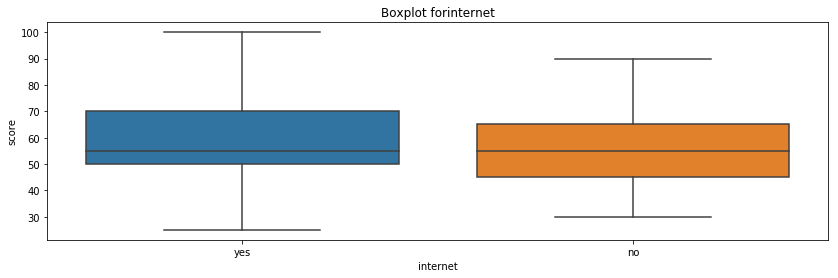

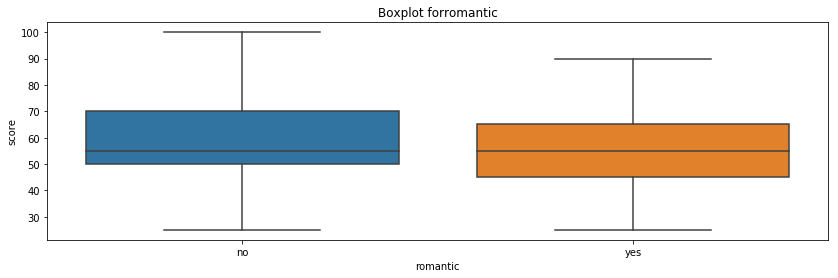

In [32]:
# Построим боксы с усами для колонок с номинативными признаками с помощью функции:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score', data=df_new, ax=ax)
    ax.set_title('Boxplot for' + column)
    plt.show()


for col in ['school', 'sex', 'address', 'famsize', 'p_status', 'm_job', 'f_job',
            'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [ ]:
## Кажется из номинальных признаков на баллы может в наибольшей степени влиять такие колонки как forf_job (teacher), 
## form_job (health), forhigher (yes), forschoolsup (no), foraddress (u), forsex(m).
## Для проверки статистической разницы в распределении оценок по номинативным признакам воспользуемся функцией.

In [ ]:
def get_stat_dif(column):
    cols = df_new.loc[:, column]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [34]:
for col in ['school','sex','address','famsize','p_status','m_job',
            'f_job','reason','guardian','schoolsup','famsup','paid',
            'activities','nursery','higher','internet','romantic']:
    get_stat_dif(col)

KeyboardInterrupt: 

In [ ]:
## Таким образом, номинальные признаки не влияют на оценки (что странно. Алексей я не очень понимаю эту функцию из образовательной программы. Нужна ваша помощь). Для построения модели будет использовать следующие колонки: 
Из числовых колонок остается колонка 'age'.